<a href="https://colab.research.google.com/github/vlt-ro/CUFICO_2019_2/blob/master/Seguimiento/Seguimiento2/N1037658970/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Librerias
import numpy as np
from scipy  import integrate
import matplotlib.pyplot as plt

## Monte Carlo
Escribir un integrador de Monte Carlo para 1D y 3D
Usar scipy.integrate.quad para comparar resultados.

N = 100, 1000, 10000

**1D**  ---> x $\in$ [1,10]

 $F1(x) = x^{-3}$

 $F2(x) = x^{\frac{-1}{2}}$

**3D** ---> x $\in$ [1,10], y $\in$ [0,2],  z $\in$ [0,2]

 $F3(x,y,z) = \frac{1}{x}+y+z^2$


Graficar  E vs. N y S² vs N

In [0]:
# Funciones
def F1_1D(x):
  return x**(-3)

def F2_1D(x):
  return x**(-0.5)

def F3_3D(x,y,z):
  return x**(-1)+y+z**2

In [0]:
# Rangos de integracion
xi = 1
xf = 10
yi = 0
yf = 2
zi = 0
zf = 2
N_points = [100,1000,10000]

In [0]:
def Integral_MC(vol,F,N):
  return vol*np.sum(F)/N

In [0]:
I1 = []
I2 = []
I3 = []

S1 = []
S2 = []
S3 = []

# Solucion de las integrales para comparar
I1_quad,_ = (integrate.quad(F1_1D,xi,xf))
I2_quad,_ = (integrate.quad(F2_1D,xi,xf))
I3_quad,_ = (integrate.nquad(F3_3D,[[xi,xf],[yi,yf],[yi,yf]]))

for i,N in enumerate(N_points):
  # Definicion de los arreglos en los intervalos de integracion
  x = (xf-xi)*np.random.random(N)+xi
  y = (yf-yi)*np.random.random(N)+yi
  z = (zf-zi)*np.random.random(N)+zi

  # Evaluacion de las funciones
  F1 = F1_1D(x)
  F2 = F2_1D(x)
  F3 = F3_3D(x,y,z)

  # Calculo de la integral
  I1.append(Integral_MC(xf-xi,F1,N))
  I2.append(Integral_MC(xf-xi,F2,N)) 
  I3.append(Integral_MC((xf-xi)*(yf-yi)*(zf-zi),F3,N)) 
  
  # Calculo de la varianza
  S1.append((xf-xi)**2*np.sum(F1**2)/N-I1[i]**2)
  S2.append((xf-xi)**2*np.sum(F2**2)/N-I2[i]**2)
  S3.append((xf-xi)*(yf-yi)*(zf-zi)*np.sum(F3**2)/N-I3[i]**2)

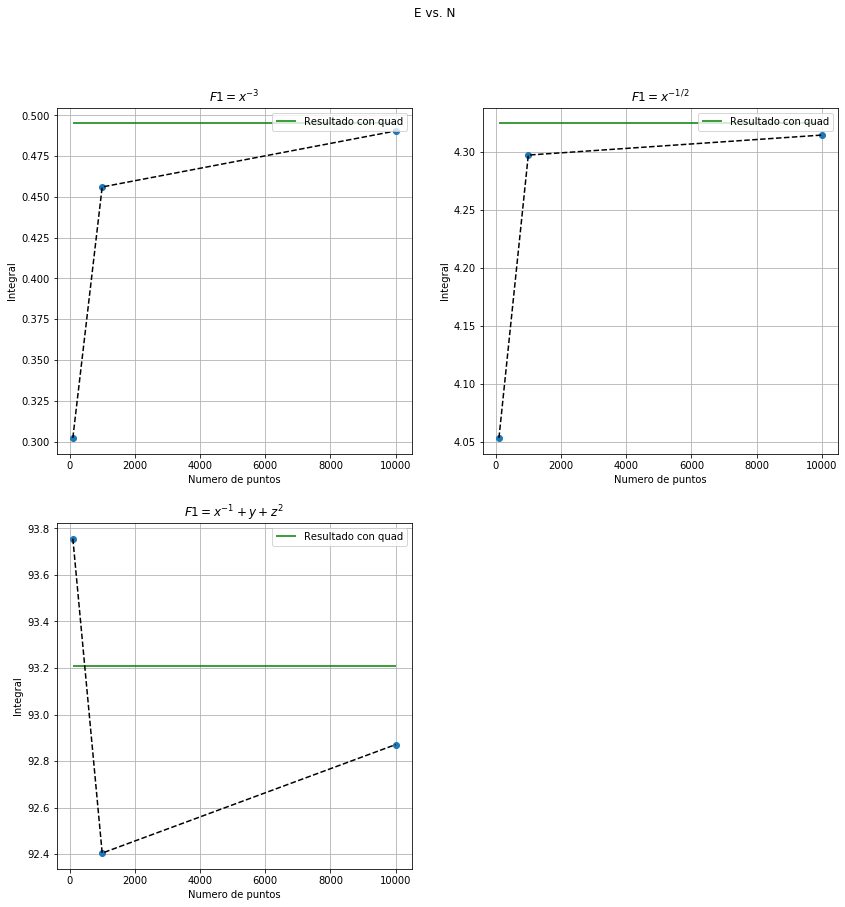

In [6]:
# Grafica de E vs. N
plt.figure(figsize=(14,14))
plt.suptitle('E vs. N')

plt.subplot(221)
plt.plot(N_points,I1,'o')
plt.plot(N_points,I1,'k--')
plt.hlines(I1_quad,min(N_points),max(N_points),'g',label='Resultado con quad')
plt.xlabel('Numero de puntos')
plt.ylabel('Integral')
plt.title(r'$F1 = x^{-3}$')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(N_points,I2,'o')
plt.plot(N_points,I2,'k--')
plt.hlines(I2_quad,min(N_points),max(N_points),'g',label='Resultado con quad')
plt.xlabel('Numero de puntos')
plt.ylabel('Integral')
plt.title(r'$F1 = x^{-1/2}$')
plt.grid()
plt.legend()

plt.subplot(223)
plt.plot(N_points,I3,'o')
plt.plot(N_points,I3,'k--')
plt.hlines(I3_quad,min(N_points),max(N_points),'g',label='Resultado con quad')
plt.xlabel('Numero de puntos')
plt.ylabel('Integral')
plt.title(r'$F1 = x^{-1}+y+z^{2}$')
plt.grid()
plt.legend()

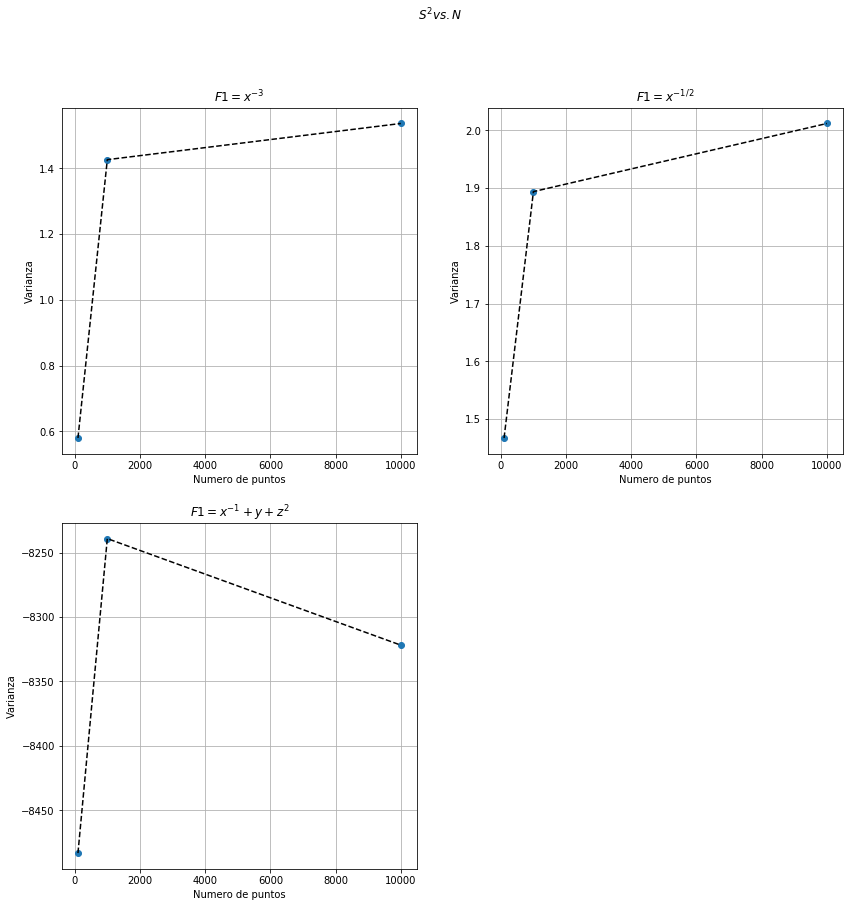

In [7]:
# Grafica de S^2 vs. N
plt.figure(figsize=(14,14))
plt.suptitle(r'$S^2 vs. N$')

plt.subplot(221)
plt.plot(N_points,S1,'o')
plt.plot(N_points,S1,'k--')
plt.xlabel('Numero de puntos')
plt.ylabel('Varianza')
plt.title(r'$F1 = x^{-3}$')
plt.grid()

plt.subplot(222)
plt.plot(N_points,S2,'o')
plt.plot(N_points,S2,'k--')
plt.xlabel('Numero de puntos')
plt.ylabel('Varianza')
plt.title(r'$F1 = x^{-1/2}$')
plt.grid()

plt.subplot(223)
plt.plot(N_points,S3,'o')
plt.plot(N_points,S3,'k--')
plt.xlabel('Numero de puntos')
plt.ylabel('Varianza')
plt.title(r'$F1 = x^{-1}+y+z^{2}$')
plt.grid()

## Implementación de muestreo estratificado

In [0]:
def stratified_sampling(N_regions,f,x):
  I = 0
  N_per_regions = np.ones(N_regions,dtype=int)*int(len(x)/N_regions)
  x = x.reshape(N_regions,-1)
  for i,N in enumerate(N_per_regions):
    vol = (max(x[i])-min(x[i]))
    I += (vol/N)*np.sum(f(x[i]))
  return I

In [0]:
I1 = []
I2 = []

N_regions = 10 # Numero de regiones para la integracion

for i,N in enumerate(N_points):
  # Definicion de los arreglos en los intervalos de integracion
  x = (xf-xi)*np.random.random(N)+xi

  # Calculo de la integral
  I1.append(stratified_sampling(N_regions,F1_1D,np.sort(x)))
  I2.append(stratified_sampling(N_regions,F2_1D,np.sort(x)))


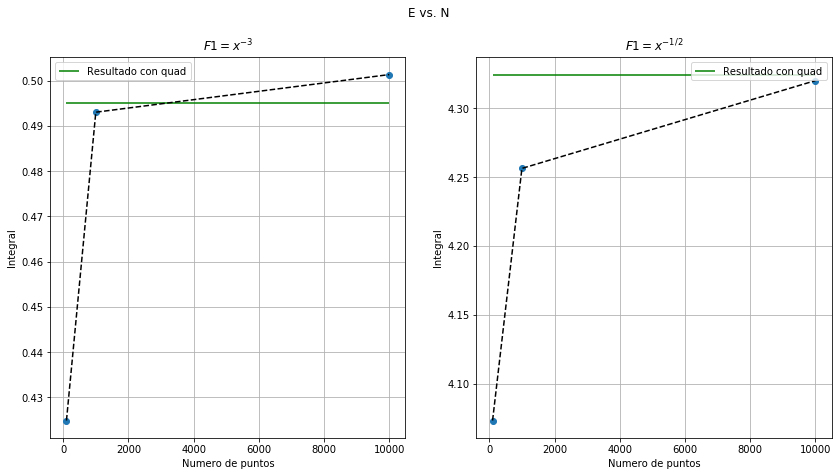

In [10]:
# Grafica de E vs. N usando muestreo estratificado
plt.figure(figsize=(14,7))
plt.suptitle('E vs. N')

plt.subplot(121)
plt.plot(N_points,I1,'o')
plt.plot(N_points,I1,'k--')
plt.hlines(I1_quad,min(N_points),max(N_points),'g',label='Resultado con quad')
plt.xlabel('Numero de puntos')
plt.ylabel('Integral')
plt.title(r'$F1 = x^{-3}$')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(N_points,I2,'o')
plt.plot(N_points,I2,'k--')
plt.hlines(I2_quad,min(N_points),max(N_points),'g',label='Resultado con quad')
plt.xlabel('Numero de puntos')
plt.ylabel('Integral')
plt.title(r'$F1 = x^{-1/2}$')
plt.grid()
plt.legend()

## Algoritmo de Metrópolis

Sea $\phi_1$ el valor inicial:

1) Generar (aleatoriamente) un nuevo candidato $\phi'$.

2) Calcular $\Delta S = -ln(P(\phi')/P(\phi_1))$.

3) Si $\Delta S < 0$ escoja $\phi_2 = \phi'$.

4) Si $\Delta S >0$ acepte un nuevo candidato solo si su probabilidad es $P(\phi')/P(\phi_1)$, de lo contrario no se acepta el estado.

5) Repetir.

----------------------------------------------------
Implementar metropolis y aplocar para el ejemplo de Rutherford 

$$P(\theta) = \frac{1}{\sigma \sqrt{2\pi}}*e^{\frac{-(\theta-\mu)^2}{2\sigma^2}}$$

$$\mu = 0 ; \sigma = 0.1$$

Generar 1000 eventos y graficar $\theta$

In [0]:
# Funcion de probabilidad
def P(theta):
  mu = 0
  sigma = 0.1
  return np.exp(-(theta-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

In [0]:
#Valor inicial
phi_0 = 2*np.pi*np.random.random()-np.pi

phi = [phi_0]

# Algoritmo
while len(phi)<1000:
  phi_p = 2*np.pi*np.random.random()-np.pi
  d_S = -np.log(P(phi_p)/P(phi[-1]))
  
  if d_S<0:
    phi.append(phi_p)

  elif d_S>0:
    x = np.random.random()

    if x<P(phi_p)/P(phi[-1]):
      phi.append(phi_p)

    elif x>P(phi_p)/P(phi_0):
      pass

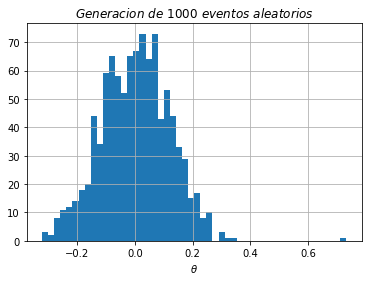

In [17]:
# Grafica de theta
plt.hist(phi, bins=50);
plt.xlabel(r'$\theta$')
plt.title(r'$Generacion\ de\ 1000\ eventos\ aleatorios$')
plt.grid()